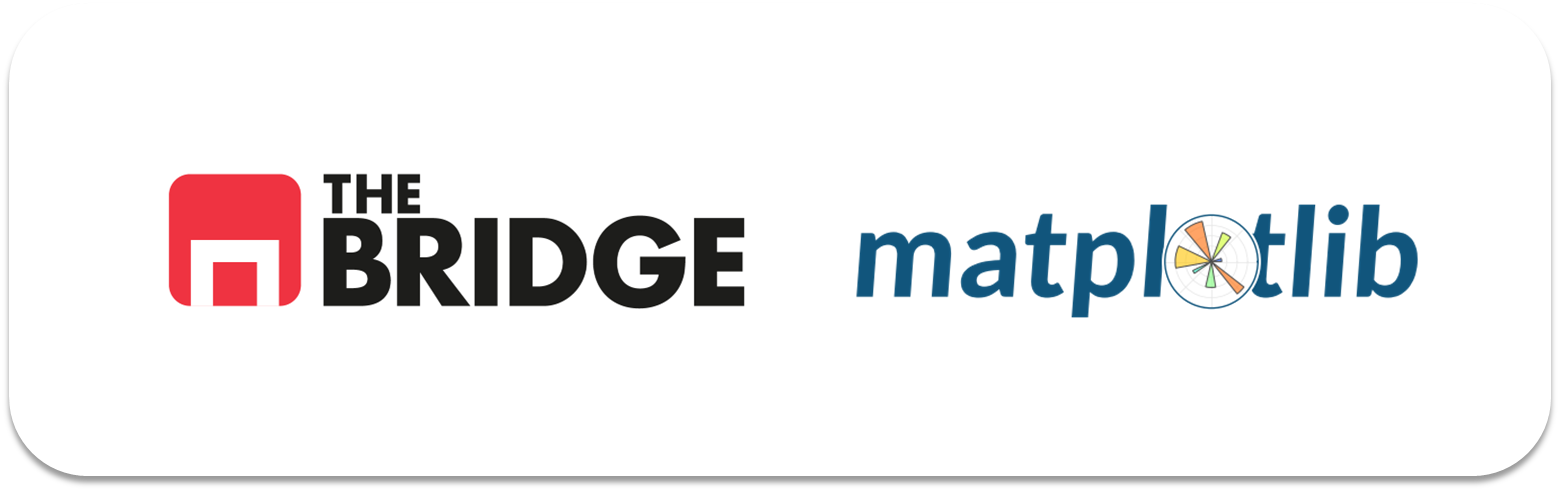

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-white")
import numpy as np
import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [2]:
cities = pd.read_csv("./data/california_cities.csv")
cities

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


In [3]:
cities["area_water_km2"].value_counts(ascending= True)

area_water_km2
0.553       1
1.339       1
0.129       1
57.540      1
0.783       1
         ... 
0.012       4
0.039       4
0.002       6
0.003       7
0.000     120
Name: count, Length: 277, dtype: int64

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

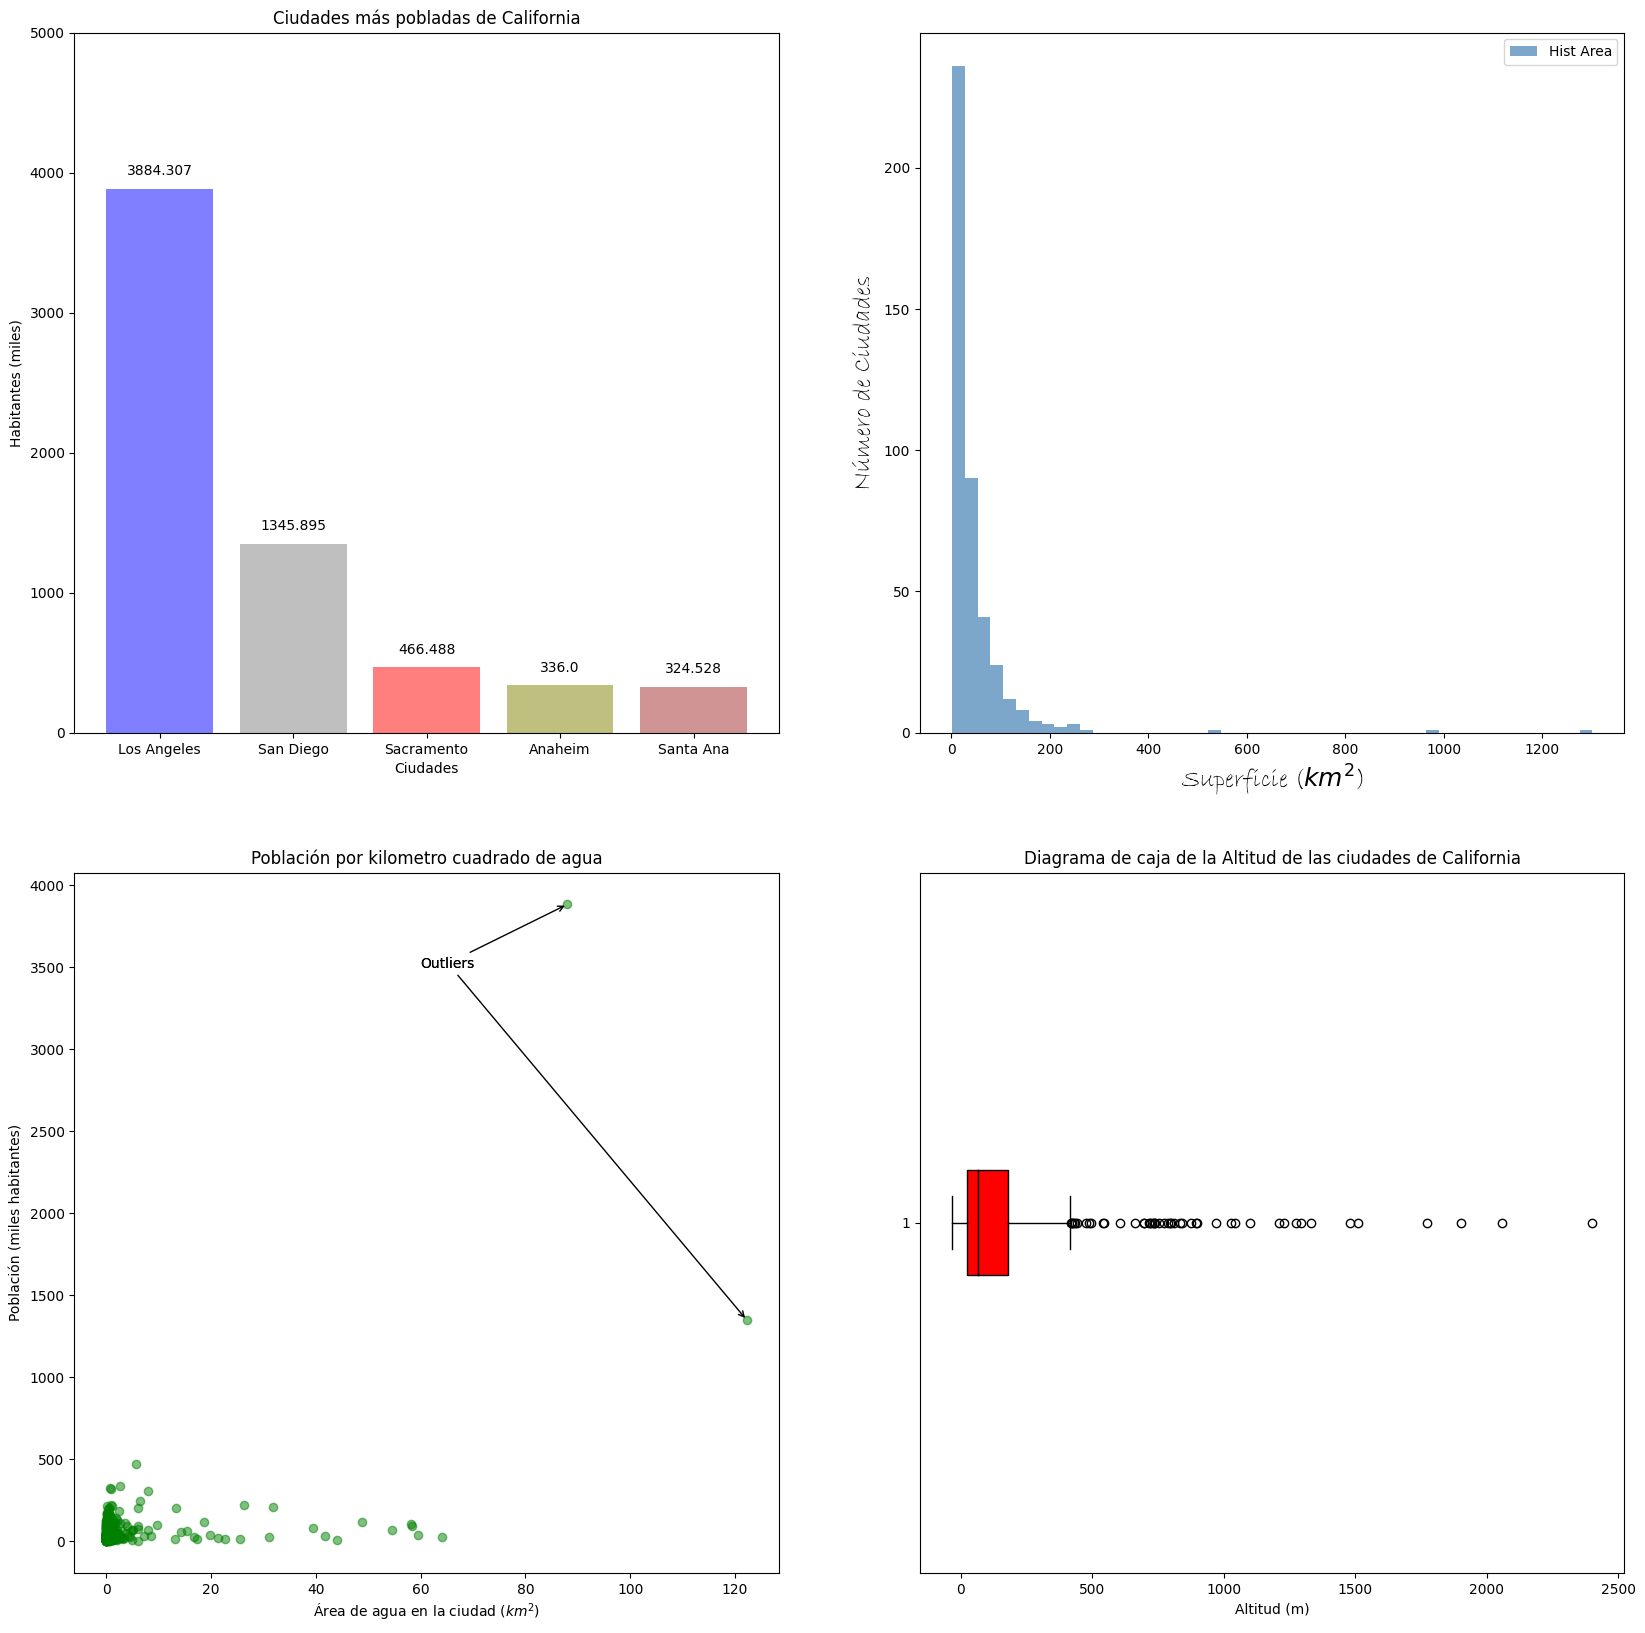

In [4]:
categorias = cities.groupby("city")["population_total"].sum().sort_values(ascending=False)[0:5].index.to_list()
frecuencias = cities.groupby("city")["population_total"].sum().sort_values(ascending=False)[0:5].to_list()
valores = []
for i in frecuencias:
    x = i/1000
    valores.append(x)

print(valores)


[3884.307, 1345.895, 1000.536, 837.442, 509.039]


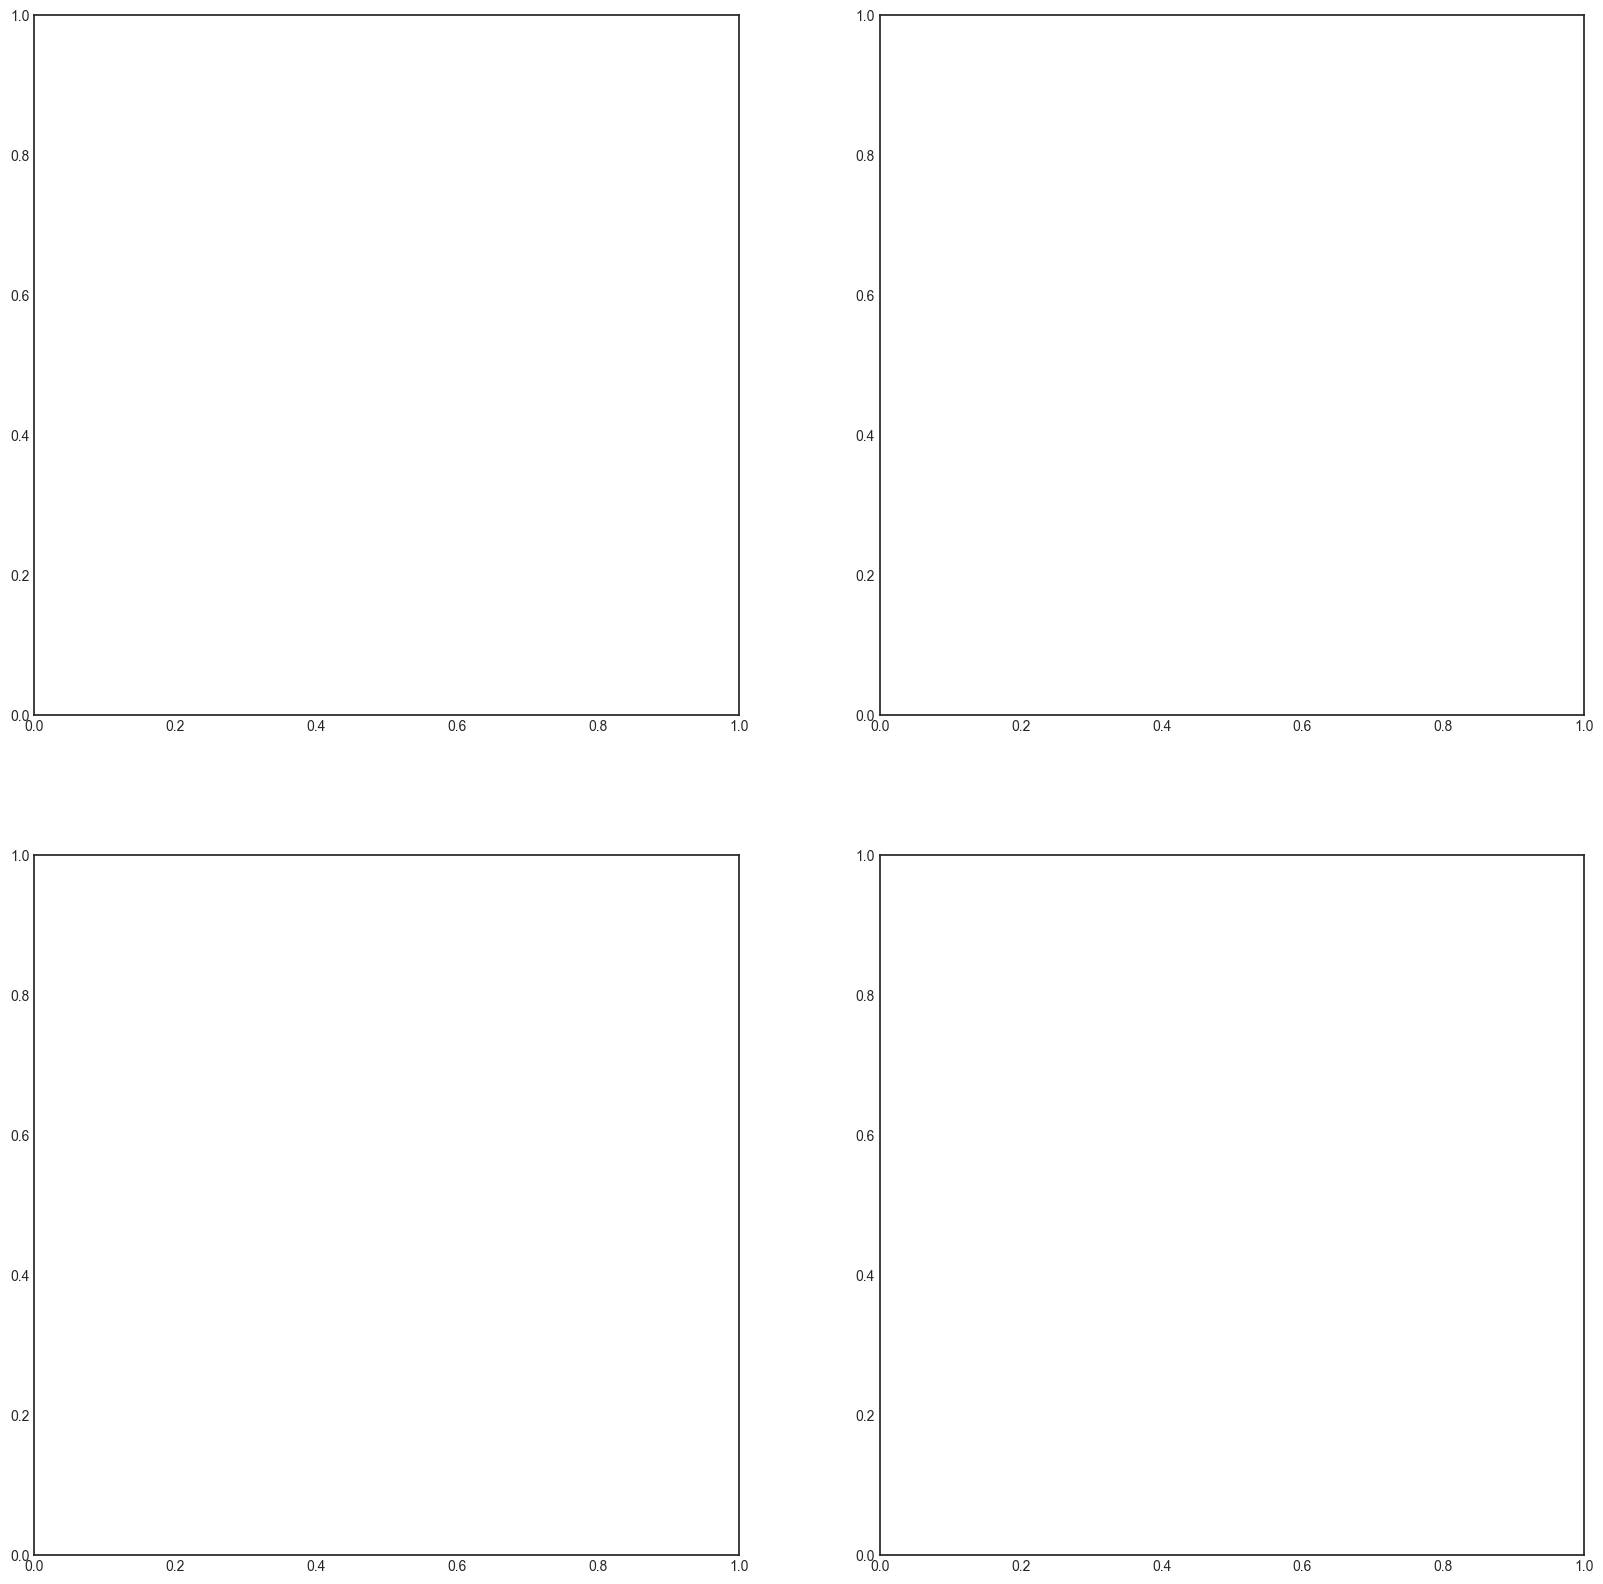

In [5]:
fig, ax = plt.subplots(2,2, figsize=(20,20));

In [6]:

bar_colors = ['tab:blue', 'tab:grey', 'tab:olive', 'tab:brown', 'tab:green']
bars = ax[0,0].bar(categorias, valores, color = bar_colors)
ax[0,0].set_ylim(0,5000)
ax[0,0].set_title("Ciudades más pobladas de California")
ax[0,0].set_xlabel("Ciudades")
ax[0,0].set_ylabel("Habitantes (miles)")

for bar, valor in zip(bars, valores):
    ax[0,0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(valor),
            ha='center', va='bottom', fontsize=8, color='black');

In [7]:
size = 18
hist = ax[0,1].hist(cities["area_total_km2"],bins = 50, alpha = 0.6, color = "steelblue", label="Hist Area")
font_dict = {
    "size": 18,
    "family":"Bradley Hand itc" 
}
ax[0,1].set_xlabel("Superficie ($Km^2$)", font_dict)
ax[0,1].set_ylabel("Número de ciudades", font_dict)
ax[0,1].legend();


In [8]:
frecuencias = cities.groupby("city")["population_total"].sum().to_list()
valores_new = []
for i in frecuencias:
    x = i/1000
    valores_new.append(x)

print(valores_new)

[31.765, 20.33, 75.467, 18.969, 83.089, 47.823, 2.827, 0.185, 19.454, 336.0, 9.932, 3.836, 107.1, 69.135, 56.364, 17.231, 17.716, 16.522, 19.304, 28.31, 6.914, 28.168, 13.33, 3.728, 13.239, 46.361, 347.483, 75.39, 29.603, 22.639, 36.877, 35.477, 42.072, 76.616, 25.835, 2.068, 26.997, 112.58, 34.29, 5.019, 1.707, 3.879, 1.253, 20.817, 1.048, 24.953, 39.282, 51.481, 4.282, 4.828, 80.53, 103.34, 28.806, 23.058, 38.572, 14.12, 7.879, 7.705, 5.155, 65.201, 39.349, 10.561, 9.918, 105.328, 3.722, 13.04, 91.714, 51.2, 45.417, 49.041, 86.187, 77.983, 75.655, 18.72, 243.916, 83.301, 34.926, 10.897, 15.25, 8.618, 101.314, 40.704, 13.38, 1.963, 1.792, 52.154, 5.971, 12.823, 96.455, 122.067, 25.515, 17.382, 158.391, 24.697, 9.253, 109.96, 7.31, 47.796, 7.643, 23.805, 38.883, 58.302, 47.802, 101.123, 33.351, 42.039, 65.622, 4.161, 1.624, 53.819, 25.938, 55.544, 21.453, 18.351, 0.939, 4.95, 111.772, 21.321, 49.89, 1.65, 28.155, 53.668, 99.478, 42.598, 23.549, 113.475, 16.654, 153.015, 10.08, 59.518, 

In [9]:
scatter = ax[1,0].scatter(cities["area_water_km2"], valores_new, alpha= 0.5, color = "green",s =20)
ax[1,0].set_xlabel("Area de agua en la ciudad ($Km^2$)")
ax[1,0].set_ylabel("Poblacion (miles habitantes)")
ax[1,0].set_title("Poblacion por kilometro cuadrado de agua")

ax[1,0].annotate("Outliers", xy=(120,130), xytext=(60,3200),
                 arrowprops=dict(facecolor='red', arrowstyle='->'))
ax[1,0].annotate("", xy=(87,3860), xytext=(68,3350),
                 arrowprops=dict(facecolor='red', arrowstyle='->'))


Text(68, 3350, '')

In [10]:
ax[1,1].boxplot(cities["elevation_m"].dropna(), patch_artist = True, boxprops = dict(facecolor = "red"), medianprops = dict(color = "black", linewidth = 1), vert = False )
ax[1,1].set_title("Diagrama de caja de la altitud de las ciudades de California")
ax[1,1].set_xlabel("Altitud (m)");


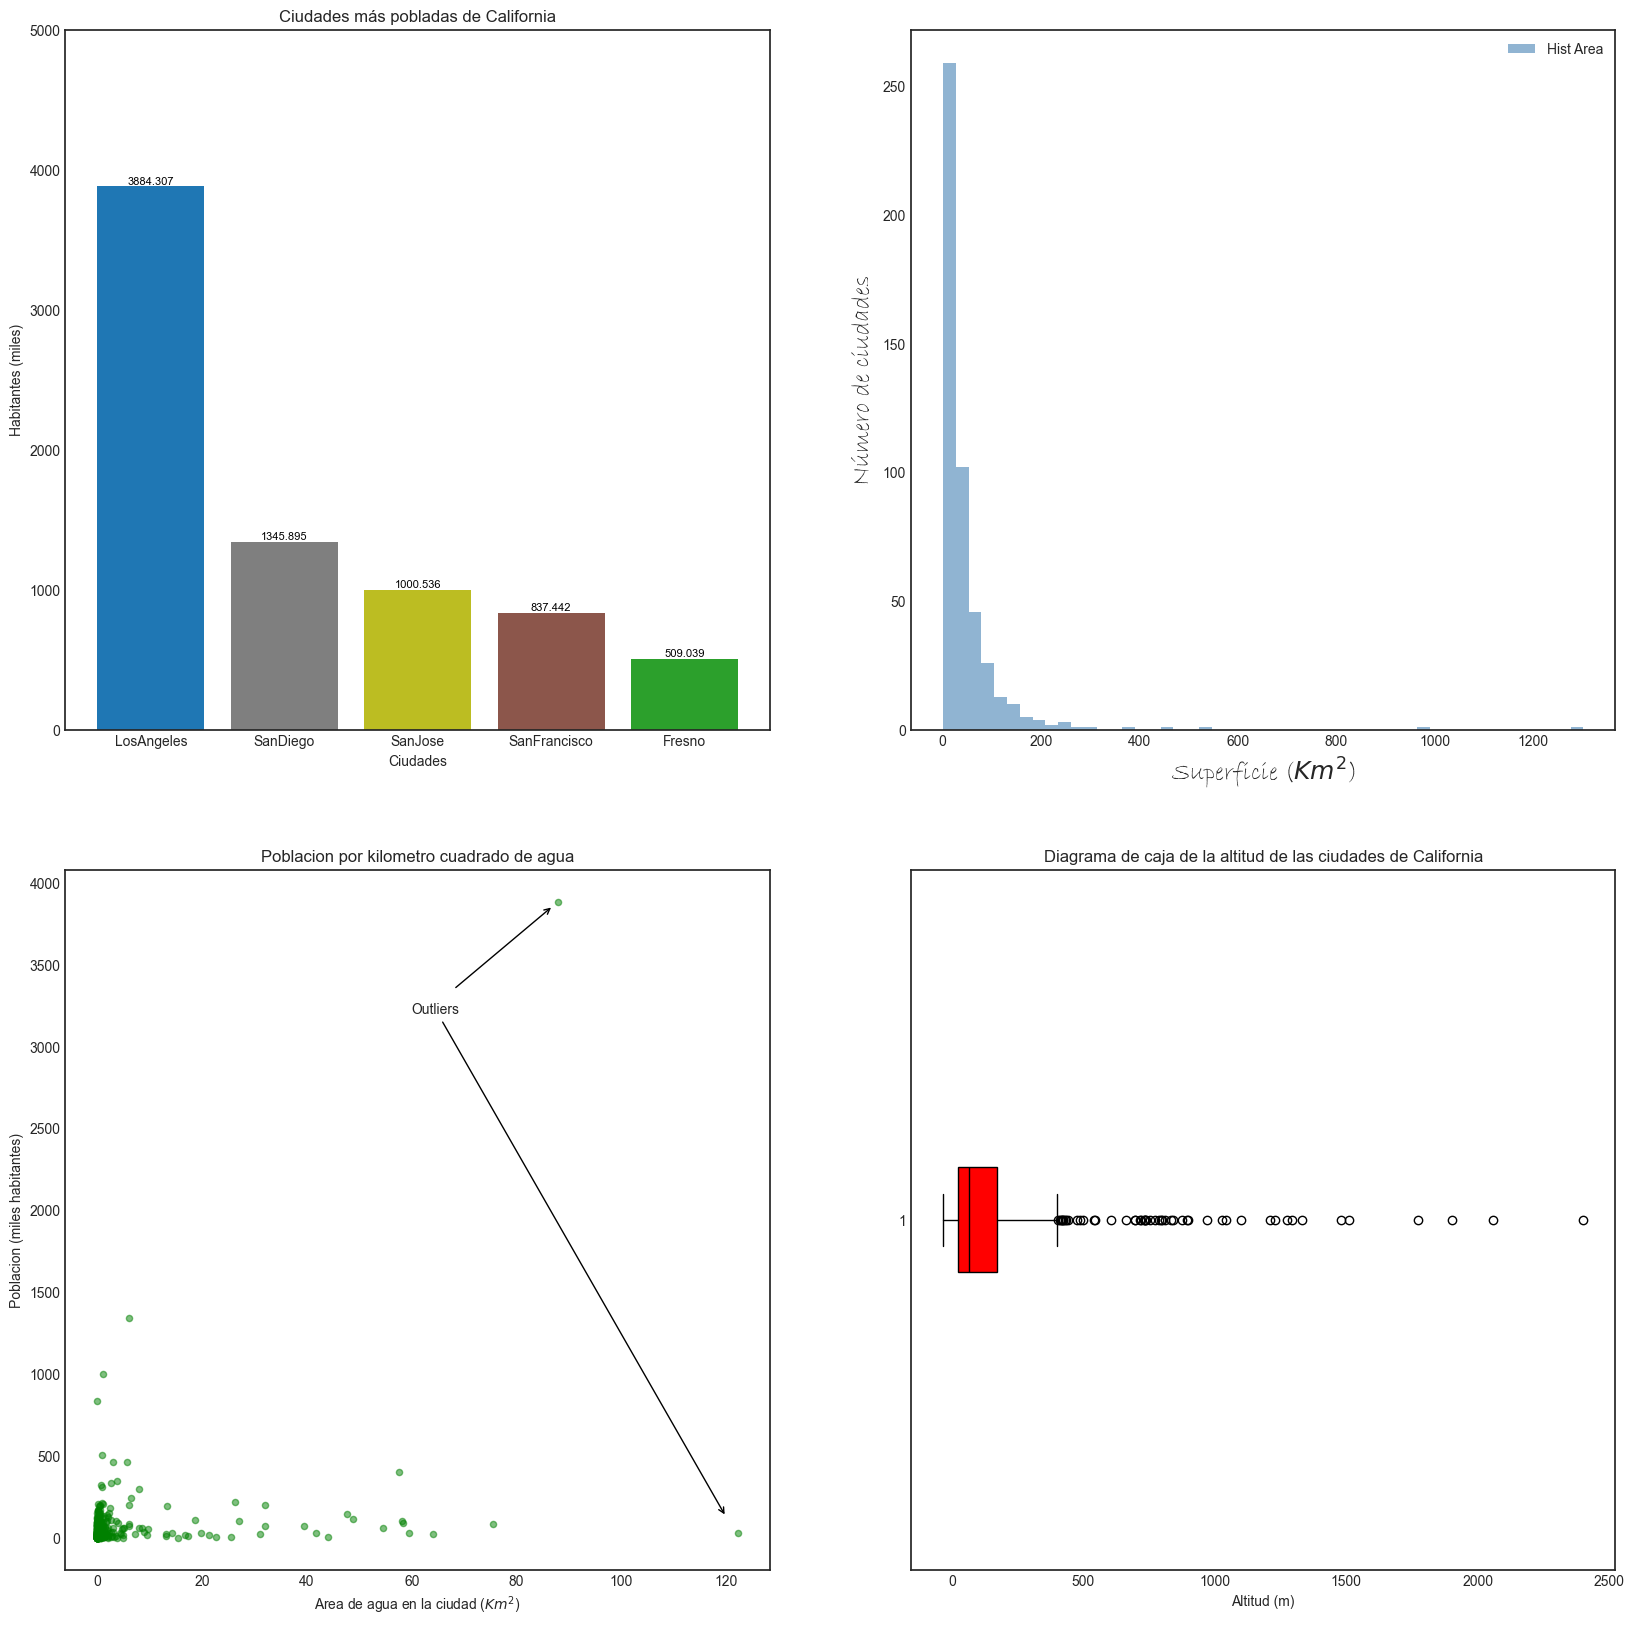

In [11]:
fig

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [13]:
fig.savefig("my_firstfigure.png")